# 📊 **Machine Learning : Analysis of Banking Campaigns**

## **Context and Use Case**
As part of a personal data analytics project, I explored a real-world banking marketing dataset to analyze the effectiveness of phone campaigns promoting a financial product Each call is recorded with information about the customer and the campaign details.

Marketing managers want to understand the key factors that influence customer behavior. They hope to identify relationships between certain characteristics (age, account balance, call duration, etc.) and the amount invested by customers after the campaigns.

🎯 **Problem Statement**
- What are the main factors that influence the amount invested by customers after a phone campaign?  
- Is there a linear relationship between certain explanatory variables and the amount invested?  
- How can the results of this analysis be used to improve future marketing campaigns and optimize resources?

📑 **Dataset Description**
| **Variable**    | **Description** | **Type** |
|------------------|-----------------|----------|
| **age**         | Customer age. |   |
| **balance**     | Customer’s average annual balance. |   |
| **duration**    | Phone call duration in seconds. |   |
| **campaign**    | Number of contacts made during the campaign. |   |
| **education**   | Customer’s education level (`primary`, `secondary`, `tertiary`, `unknown`). |   |
| **deposit**     | Amount invested by the customer after the campaign. |   |

🔍 **Analysis Objectives**
1. **Explore the data:** Identify trends, missing values, and correlations.
2. **Prepare the data:** Clean the data, handle missing values, and encode categorical variables.
3. **Analyze relationships:** Visualize relationships between variables before modeling.
4. **Model the relationships:** Use linear regression to predict the invested amount.
5. **Evaluate the model:** Measure performance using metrics such as RMSE, MAE, and R².
6. **Interpret the results:** Identify the most influential variables and formulate recommendations.
7. **Practical Case:** Use the model to estimate the invested amount and optimize future campaigns.


## **EAD**


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np


In [4]:
# Import the data
df_BM  = pd.read_csv("/kaggle/input/bank-marketing/bank_marketing.csv")
df_BM.head()

,age,balance,duration,campaign,education,deposit
0,40.0,2699.68,232.0,4,unknown,2309.82
1,34.0,2462.32,286.0,2,secondary,2138.42
2,41.0,2029.82,221.0,1,secondary,2220.13
3,50.0,1676.53,269.0,2,primary,2282.65
4,NaN,2349.11,111.0,5,secondary,2161.01


In [5]:
df_BM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        900 non-null    float64
 1   balance    1000 non-null   float64
 2   duration   900 non-null    float64
 3   campaign   1000 non-null   int64  
 4   education  1000 non-null   object 
 5   deposit    1000 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB


## **Data cleaning**
Age and durantion has both 100 missing value. The types of the varables are all correct.


In [9]:
# Fill all missing values in the age column with the median age
df_BM['age'] = df_BM['age'].fillna(df_BM['age'].median())

In [8]:
# Deleting missing values in the duration column
df_BM = df_BM.dropna(subset=['duration'])

In [10]:
# This transformation converts the education variable into numerical features, making it suitable for the model
df_BM = pd.get_dummies(df_BM, columns=['education'],prefix='edu')

In [11]:
#  Double check if that the data set is clean
df_BM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            900 non-null    float64
 1   balance        900 non-null    float64
 2   duration       900 non-null    float64
 3   campaign       900 non-null    int64  
 4   deposit        900 non-null    float64
 5   edu_primary    900 non-null    bool   
 6   edu_secondary  900 non-null    bool   
 7   edu_tertiary   900 non-null    bool   
 8   edu_unknown    900 non-null    bool   
dtypes: bool(4), float64(4), int64(1)
memory usage: 45.7 KB


## **Building the Prediction Model**


<Axes: >

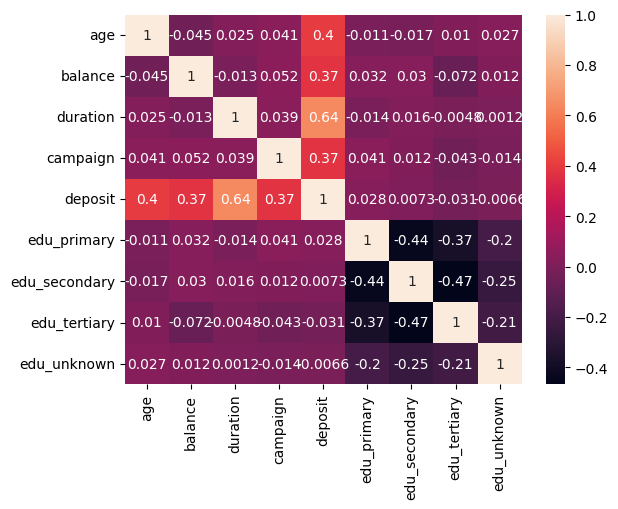

In [12]:
# Correlation matrix visualization to identify variables correlated with the deposit
sns.heatmap(df_BM.corr(), annot=True)

<Axes: xlabel='duration', ylabel='deposit'>

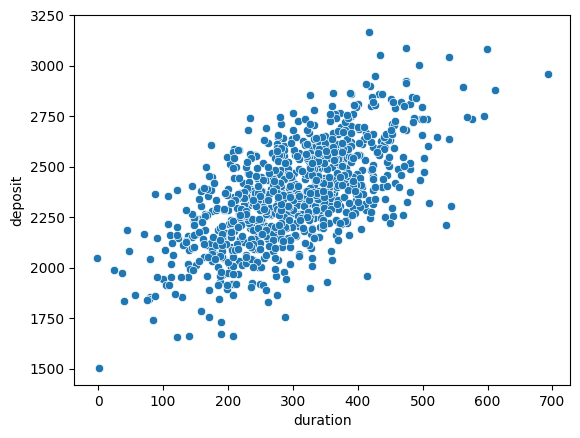

In [13]:
# Duration has the highest correlation score with the deposit. 
# To check if the relationship is linear, here is a scatter plot
sns.scatterplot(df_BM,x='duration',y='deposit')

In [15]:
# Creating the DataFrames `X` and `y`
# `X` includes the explanatory variables, and `y` represents the target variable
x = df_BM.drop(columns='deposit')
y = df_BM['deposit']

In [16]:
#Split the data into training and testing sets (80% training, 20% testing).
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
# Implemating  the prediction model using LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

## **Performance Analysis**


In [18]:
# Coefficients represent the impact of each feature on the predicted value.
# Generates predicted values of the target variable for the test dataset using the
Coef = model.coef_ 
y_pred = model.predict(x_test)

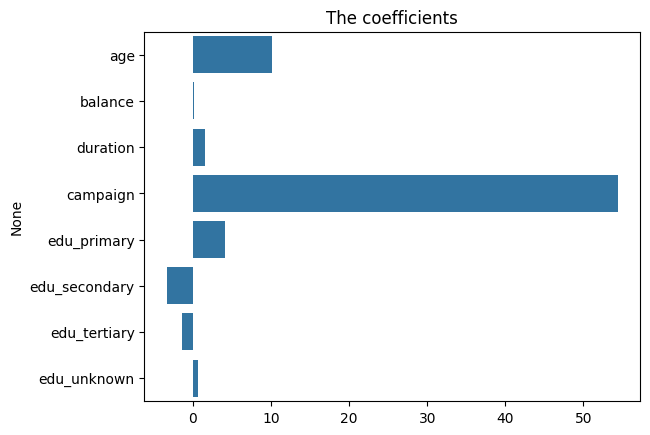

In [19]:
sns.barplot(y=x_train.columns, x=model.coef_)
plt.title("The coefficients")
plt.show()

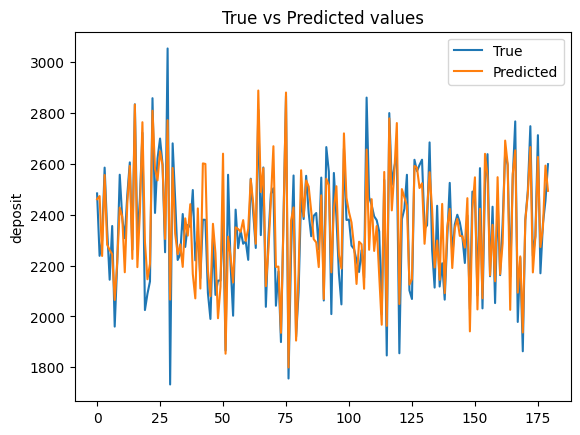

In [20]:
sns.lineplot(x=range(len(y_test)), y=y_test, label="True")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted")
plt.legend()
plt.title("True vs Predicted values")
plt.show()


In [21]:
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('RMSE: ',mean_squared_error(y_pred,y_test)**(1/2))
print('R au carré: ',r2_score(y_pred,y_test))

MAE:  82.62657710473408
MSE:  11195.1461365911
RMSE:  105.80711760836839
R au carré:  0.7527470984161373


Estimate the invested amount for a client with the following values:
- `age`: 40  
- `balance`: 2000  
- `duration`: 350  
- `campaign`: 3  


In [22]:
sample_data = np.array([[80, 2000, 600, 3,1,0,0,0]])
prediction = model.predict(sample_data)
print(f"Predicted deposit amount: {prediction[0]:.2f} $")

Predicted deposit amount: 3271.13 $


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## **Answering the business question and recommendations**

The main factor influencing the amount invested by customers after a phone campaign is the duration of the phone call, followed by age, which has a lower influence.

There is a linear relationship between **duration and the amount invested**

Based on the analysis and predictions, the longer the phone call, the higher the deposit amount tends to be.
**Future phone campaigns should therefore focus on discussion topics that encourage clients to express themselves, such as a review of their banking situation, feedback on services, and their financial needs or futur projects**. While allowing clients to speak freely, the conversation should remain structured and guided by the caller to ensure reassurance and clarity.

Additionally, age shows a smaller influence on deposit behavior, suggesting that **targeting an older age group** could be an interesting strategy to test in future campaigns.